## DLC Analysis


In [1]:
# Load all the tools
import numpy as np

from openfast_io import FileTools

import pandas as pd


import matplotlib.pyplot as plt

import openmdao.api as om

import matplotlib
# font = {
# #         'family' : 'normal',
# #         'weight' : 'bold',
#         'size'   : 14
#        }

# matplotlib.rc('font', **font)

import ruamel.yaml as ry



Timeseries plotting function

In [2]:
def plot_tss(dfs,channels):

    fig, axs = plt.subplots(len(channels),1)
    fig.set_size_inches(12,2*len(channels))

    if len(channels) == 1:
        axs = [axs]

    axs = axs.flatten()
    
    for df in dfs:

        for i_chan, chan in enumerate(channels):
            axs[i_chan].plot(df.Time,df[chan])
            axs[i_chan].set_ylabel(chan)
            axs[i_chan].grid()

        axs[-1].set_xlabel('Time')
        
    [a.set_xticklabels('') for a in axs[:-1]]
    [a.grid(True) for a in axs]
        
    fig.patch.set_facecolor('white')
    fig.align_ylabels()

    
    return fig, axs

# Case Info

In [3]:

# Function for reading case matrix
def read_cm(fname_case_matrix):
    cm_dict = FileTools.load_yaml(fname_case_matrix, package=1)
    cnames = []
    for c in list(cm_dict.keys()):
        if isinstance(c,ry.comments.CommentedKeySeq):
            cnames.append(tuple(c))
        else:
            cnames.append(c)

    cm = pd.DataFrame(cm_dict, columns=cnames)

    cm['DLC'].unique()

    dlc_inds = {}

    for dlc in cm['DLC'].unique():
        dlc_inds[dlc] = cm['DLC'] == dlc
        
    return cm, dlc_inds


In [4]:
fname_case_matrix = 'outputs/openfast_runs/case_matrix_combined.yaml'


cm, dlc_inds = read_cm(fname_case_matrix)

cm

,case_name,DLC,"(AeroDyn, Wake_Mod)","(AeroDyn, tau1_const)","(ElastoDyn, BlPitch1)","(ElastoDyn, BlPitch2)","(ElastoDyn, BlPitch3)","(ElastoDyn, NacYaw)","(ElastoDyn, RotSpeed)","(Fst, TMax)",...,"(InflowWind, WindType)","(InflowWind, FileName_Uni)","(InflowWind, FileName_BTS)","(ServoDyn, BlPitchF(1))","(ServoDyn, BlPitchF(2))","(ServoDyn, BlPitchF(3))","(ServoDyn, TPitManS1)","(ServoDyn, TPitManS2)","(ServoDyn, TPitManS3)","(ServoDyn, TimGenOf)"
DLC1.6_0_IEA_22_Semi_0,DLC1.6_0_IEA_22_Semi_0,1.6,1,25.207395,-0.176208,-0.176208,-0.176208,0,6.155847,0.5,...,3,wind/IEA_22_Semi_NTM_U10.000000_Seed1501552846...,wind/IEA_22_Semi_NTM_U10.000000_Seed1501552846...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DLC6.1_1_IEA_22_Semi_0,DLC6.1_1_IEA_22_Semi_0,6.1,0,NaN,90.000000,90.000000,90.000000,-8,0.000000,0.5,...,3,wind/IEA_22_Semi_1EWM50_U10.000000_Seed4882003...,wind/IEA_22_Semi_1EWM50_U10.000000_Seed4882003...,90.0,90.0,90.0,0.0,0.0,0.0,0.0
DLC6.1_1_IEA_22_Semi_1,DLC6.1_1_IEA_22_Semi_1,6.1,0,NaN,90.000000,90.000000,90.000000,8,0.000000,0.5,...,3,wind/IEA_22_Semi_1EWM50_U10.000000_Seed4882003...,wind/IEA_22_Semi_1EWM50_U10.000000_Seed4882003...,90.0,90.0,90.0,0.0,0.0,0.0,0.0


In [5]:
dlc_inds

{'1.6': DLC1.6_0_IEA_22_Semi_0     True
 DLC6.1_1_IEA_22_Semi_0    False
 DLC6.1_1_IEA_22_Semi_1    False
 Name: DLC, dtype: bool,
 '6.1': DLC1.6_0_IEA_22_Semi_0    False
 DLC6.1_1_IEA_22_Semi_0     True
 DLC6.1_1_IEA_22_Semi_1     True
 Name: DLC, dtype: bool}

# Summary Stats
Generated if
        `save_timeseries: True`,
        `save_iterations: True`
in modeling options

Includes stats for all the OpenFAST outputs, if the simulations run to completion

In [6]:
ss = pd.read_pickle("outputs/openfast_runs/iteration_1/summary_stats.p")
ss

,Time,Wind1VelX,Wind1VelY,Wind1VelZ,Azimuth,BldPitch1,BldPitch2,BldPitch3,GenSpeed,LSSTipMya,...,TwrBsAxMxyt,TwrBsAxMzt,TwrBsShFxyt,TwrBsShFzt,TwrBsShMxyt,TwrBsShMzt,openfast_failed,dBldPitch1,dBldPitch2,dBldPitch3
,min,min,min,min,min,min,min,min,min,min,...,integrated,integrated,integrated,integrated,integrated,integrated,integrated,integrated,integrated,integrated
DLC1.6_0_IEA_22_Semi_0.outb,0.0,9.602113,-0.339253,-0.442074,0.0,-0.42069,-0.42069,-0.42069,5.763141,-1595.356689,...,42320.151456,3279.204454,678.420175,13984.249297,42320.151456,3279.204454,0.0,-2.444823e-01,-2.444823e-01,-2.444823e-01
DLC6.1_1_IEA_22_Semi_0.outb,0.0,47.074505,-1.512102,-1.738402,0.0,90.00000,90.00000,90.00000,-0.106751,-911.062744,...,38041.112450,1435.418134,665.035832,13615.123857,38041.112450,1435.418134,0.0,9.094947e-15,9.094947e-15,9.094947e-15
DLC6.1_1_IEA_22_Semi_1.outb,0.0,47.074505,-1.512102,-1.738402,0.0,90.00000,90.00000,90.00000,-0.199878,-3026.879883,...,40499.607150,2728.112112,702.047087,13717.004951,40499.607150,2728.112112,0.0,9.094947e-15,9.094947e-15,9.094947e-15


In [7]:
ss['GenSpeed']['max'].sort_values(ascending=False).head(10)

ss['PtfmPitch']['max'].sort_values(ascending=True).head(20)


DLC1.6_0_IEA_22_Semi_0.outb    0.023776
DLC6.1_1_IEA_22_Semi_0.outb    0.027938
DLC6.1_1_IEA_22_Semi_1.outb    0.028977
Name: max, dtype: float64

In [8]:
def mag_approx(df,chans,mag_chan='shear'):
    df[mag_chan] = np.sqrt(np.sum(df[chans]**2,axis=1))
    
    
def max_df(df,chans,max_or_min='max'):
    max_df = pd.DataFrame()
    for chan in chans:
        max_df[chan] = df[chan][max_or_min]
        
    return max_df
    

In [9]:

blade1_chans = ['RootMyb3','RootMxb3']

blade_max = max_df(ss,blade1_chans)

mag_approx(blade_max,blade1_chans)


blade_max['shear'].max()

61138.57976468171

In [10]:
# Script for checking min/max of each dlc

dlcs = ['6.1']
# dlcs = ['5.1']
channels = ['PtfmSurge', 'PtfmSway', 'PtfmHeave', 'PtfmRoll','PtfmPitch','PtfmYaw']


for dlc in dlcs:
    for chan in channels:
        ss_max = ss.reset_index()[dlc_inds[dlc].values][chan]['max']
        ss_min = ss.reset_index()[dlc_inds[dlc].values][chan]['min']
        i_max = ss_max.argmax()
        i_min = ss_min.argmin()
        print(f"DLC {dlc}: Max {chan} of {ss_max.max():.3f} in {ss.index[ss_max.index[i_max]]}")
        print(f"DLC {dlc}: Min {chan} of {ss_min.max():.3f} in {ss.index[ss_min.index[i_min]]}")


# ss.index[2]

DLC 6.1: Max PtfmSurge of 0.012 in DLC6.1_1_IEA_22_Semi_1.outb
DLC 6.1: Min PtfmSurge of 0.000 in DLC6.1_1_IEA_22_Semi_0.outb
DLC 6.1: Max PtfmSway of 0.002 in DLC6.1_1_IEA_22_Semi_1.outb
DLC 6.1: Min PtfmSway of -0.000 in DLC6.1_1_IEA_22_Semi_0.outb
DLC 6.1: Max PtfmHeave of 0.036 in DLC6.1_1_IEA_22_Semi_0.outb
DLC 6.1: Min PtfmHeave of 0.000 in DLC6.1_1_IEA_22_Semi_0.outb
DLC 6.1: Max PtfmRoll of 0.003 in DLC6.1_1_IEA_22_Semi_0.outb
DLC 6.1: Min PtfmRoll of -0.000 in DLC6.1_1_IEA_22_Semi_1.outb
DLC 6.1: Max PtfmPitch of 0.029 in DLC6.1_1_IEA_22_Semi_1.outb
DLC 6.1: Min PtfmPitch of 0.000 in DLC6.1_1_IEA_22_Semi_0.outb
DLC 6.1: Max PtfmYaw of 0.000 in DLC6.1_1_IEA_22_Semi_1.outb
DLC 6.1: Min PtfmYaw of -0.000 in DLC6.1_1_IEA_22_Semi_0.outb


# Plot maxima for each DLC vs. wind speed

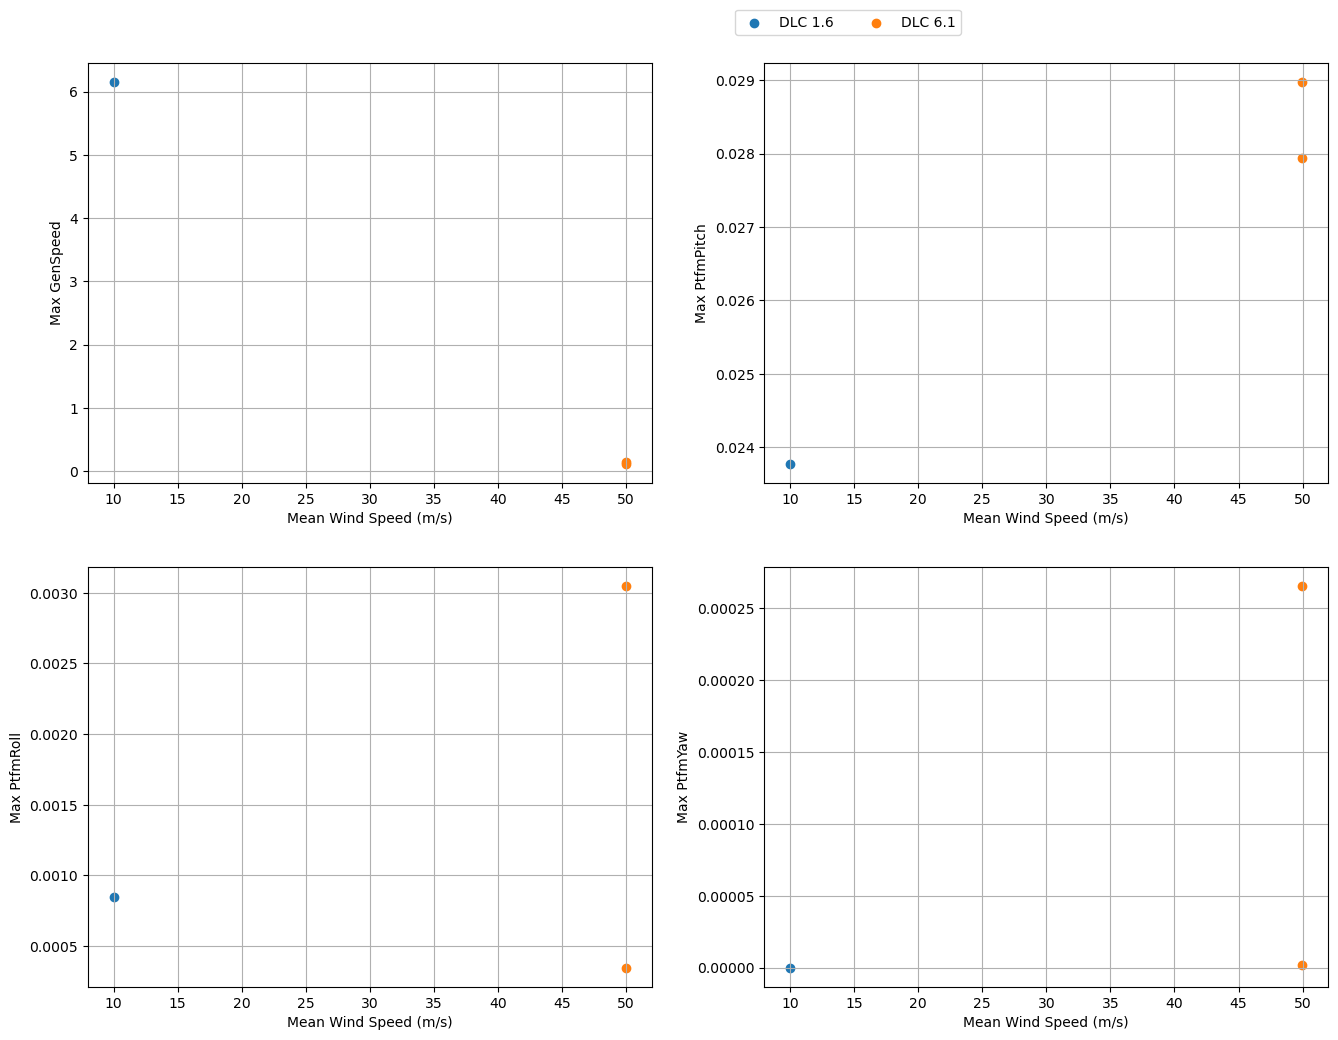

In [11]:
dlcs = cm['DLC'].unique()
dlc_labs = [f'DLC {num}' for num in dlcs]


channels = ['GenSpeed','PtfmPitch','PtfmRoll','PtfmYaw']


# fig, axs = plt.subplots(len(channels),1)
fig, axs = plt.subplots(2,2)
axs = axs.flatten()
fig.set_size_inches(16,3*len(channels))



for i_chan, chan in enumerate(channels):

    for i_dlc, dlc in enumerate(dlcs):

        dlc_ind = cm['DLC'] == dlc
        axs[i_chan].scatter(
            ss.reset_index()['Wind1VelX']['mean'].to_numpy()[dlc_ind],
            ss.reset_index()[chan]['max'].to_numpy()[dlc_ind],
            label=dlc_labs[i_dlc]
        )
        axs[i_chan].grid()
        axs[i_chan].set_xlabel('Mean Wind Speed (m/s)')
        axs[i_chan].set_ylabel(f'Max {chan}')
        axs[i_chan].grid(True)


# axs[0].plot([0,30],[1.3*7.56,1.3*7.56],'k--')
# [a.set_xlim([3,28]) for a in axs]

fig.legend(
    [f'DLC {d}' for d in dlcs],
    ncol=3,
    loc='upper right', bbox_to_anchor=(.675, .93)
)

# [a.grid() for a in axs]

# Plotting

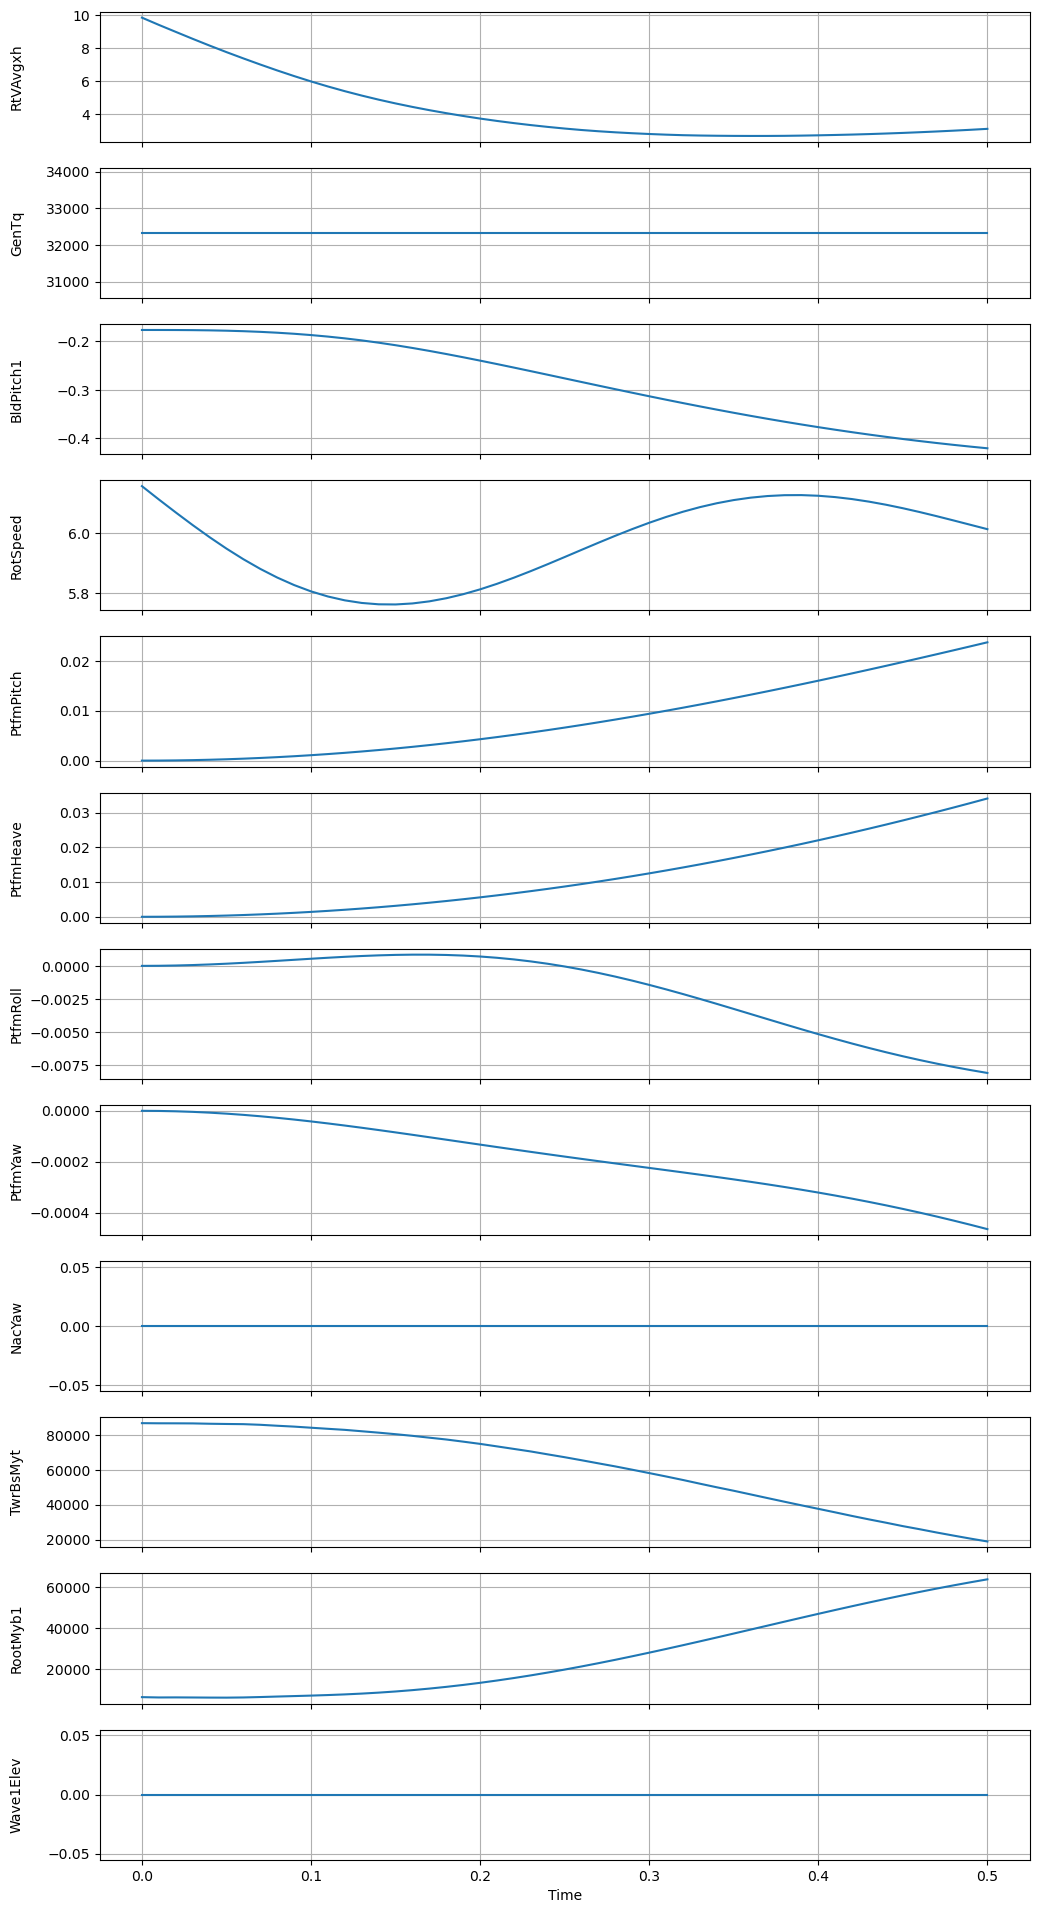

In [12]:

ts1 = pd.read_pickle('outputs/openfast_runs/iteration_0/timeseries/IEA_22_Semi_0.p')
# ts2 = pd.read_pickle('outputs/iteration_1/timeseries/IEA15_1.p')
channels = ['RtVAvgxh','GenTq','BldPitch1','RotSpeed','PtfmPitch','PtfmHeave','PtfmRoll','PtfmYaw','NacYaw','TwrBsMyt','RootMyb1','Wave1Elev']
fig,axs = plot_tss([ts1],channels)

# [a.set_xlim([200,300]) for a in axs]